In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [3]:
df.rename(columns={' Income ':'Income'}, inplace=True) # remove space from income column

In [4]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [5]:
# How long the person has been a customer in days
df['Customer_duration_days'] = datetime.datetime.now() - df['Dt_Customer']
df['Customer_duration_days'] = df['Customer_duration_days'].apply(lambda x: x.days)

In [6]:
df['Age'] = datetime.datetime.now().year - df['Year_Birth']

In [7]:
df["Income"] = df.groupby("Age")["Income"].transform(lambda x: x.fillna(x.median()))

In [8]:
df = df.drop(['ID','Year_Birth','Dt_Customer'],axis=1)

In [9]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_duration_days,Age
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,...,0,0,0,0,0,1,0,Spain,2933,52
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,...,0,0,0,0,1,1,0,Canada,2934,61
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,...,0,0,0,0,0,0,0,USA,2967,64
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,...,0,0,0,0,0,0,0,Australia,2969,55
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,...,1,0,0,0,0,1,0,Spain,3002,33


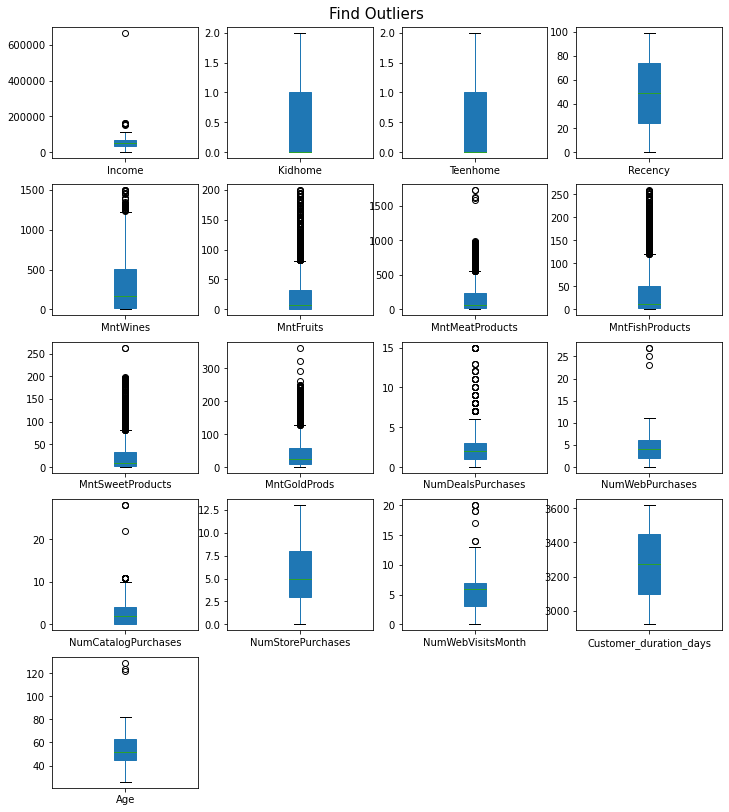

In [10]:
# See if there is any outliers
import matplotlib.pyplot as plt 
# select columns to plot
df_to_plot = df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
df_to_plot.plot(subplots=True, layout=(5,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.show()

In [11]:
#Lets define outliers function which returns a list of index of outliers.
def outliers (df,ft):
    Q1 = df[ft].quantile(0.25) 
    Q3 = df[ft].quantile(0.75) 
    IQR = Q3 - Q1
    
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)

    # create a list which having indices of outliers 
    ls = df.index[ (df[ft] < lower_range) | (df[ft] > upper_range) ]
    return ls

In [12]:
#list out feature having outliers from datframe
features = ['Age','Income','MntWines','MntFruits','MntMeatProducts', 
            'MntFishProducts','MntSweetProducts','MntGoldProds', 
            'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumWebVisitsMonth']

In [13]:
#create an empty list to store output indices from multiple columns

index_list = []
### extract the outliers from each columns
for feature in features:
    index_list.extend(outliers(df,feature))

In [14]:
#define a function called 'remove_outliers' which returns a cleaned dataframe without outliers
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [15]:
df_cleaned = remove(df,index_list)
df_cleaned.shape

(1534, 27)

In [16]:
df_cleaned.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_duration_days,Age
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,...,0,0,0,0,1,1,0,Canada,2934,61
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,...,0,0,0,0,0,0,0,USA,2967,64
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,...,0,0,0,0,0,0,0,Australia,2969,55
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,...,1,0,0,0,0,1,0,Spain,3002,33
6,2n Cycle,Married,63564.0,0,0,0,769,80,252,15,...,1,0,0,0,0,1,0,Germany,3071,68


In [17]:
new_df = df_cleaned.copy()

In [18]:
new_df['Teenagers'] = new_df[['Kidhome','Teenhome']].sum(axis=1)

In [19]:
education_map = {"Graduation":"UnderGraduate", "2n Cycle":"Master", "PhD":"PhD", "Basic":"Basic", "Master":"Master"}

new_df['Education'] = new_df['Education'].map(education_map, na_action='ignore')

In [20]:
marital_map = {'Divorced':'Divorced', 'Single':'Single', 'Married':'Married', 'Together':'Single', 
               'Widow':'Widow', 'YOLO':'Married', 'Alone':'Single', 'Absurd':'Married'}

new_df['Marital_Status'] = new_df['Marital_Status'].map(marital_map)

In [21]:
# Total number of marketing campaigns the customer has accepted
new_df['TotalCmpAccept'] = new_df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                               'AcceptedCmp1','AcceptedCmp2', 'Response']].sum(axis=1)

In [22]:
# Total amount spent on products
new_df['TotalProducts'] = new_df[['MntWines', 'MntFruits','MntMeatProducts', 
                              'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)

In [23]:
# Total number of purchase
new_df['TotalPurchases'] = new_df[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 
                 'NumStorePurchases', 'NumWebVisitsMonth']].sum(axis=1)

In [24]:
new_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Response,Complain,Country,Customer_duration_days,Age,Teenagers,TotalCmpAccept,TotalProducts,TotalPurchases
1,UnderGraduate,Single,57091.0,0,0,0,464,5,64,7,...,1,1,0,Canada,2934,61,0,2,577,23
2,UnderGraduate,Married,67267.0,0,1,0,134,11,59,15,...,0,0,0,USA,2967,64,1,0,251,13
3,UnderGraduate,Single,32474.0,1,1,0,10,0,1,0,...,0,0,0,Australia,2969,55,2,0,11,11
4,UnderGraduate,Single,21474.0,1,0,0,6,16,24,11,...,0,1,0,Spain,3002,33,1,2,91,15
6,Master,Married,63564.0,0,0,0,769,80,252,15,...,0,1,0,Germany,3071,68,0,2,1215,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,UnderGraduate,Widow,42429.0,0,1,99,55,0,6,2,...,0,0,0,Spain,3058,49,1,0,67,12
2234,UnderGraduate,Divorced,78901.0,0,1,99,321,11,309,33,...,0,0,0,USA,3205,49,1,0,734,24
2235,PhD,Divorced,66476.0,0,1,99,372,18,126,47,...,0,0,0,USA,3399,46,1,0,689,24
2236,Master,Married,31056.0,1,0,99,5,10,13,3,...,0,0,0,Spain,3443,45,1,0,55,13


In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 1 to 2237
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Education               1534 non-null   object 
 1   Marital_Status          1534 non-null   object 
 2   Income                  1534 non-null   float64
 3   Kidhome                 1534 non-null   int64  
 4   Teenhome                1534 non-null   int64  
 5   Recency                 1534 non-null   int64  
 6   MntWines                1534 non-null   int64  
 7   MntFruits               1534 non-null   int64  
 8   MntMeatProducts         1534 non-null   int64  
 9   MntFishProducts         1534 non-null   int64  
 10  MntSweetProducts        1534 non-null   int64  
 11  MntGoldProds            1534 non-null   int64  
 12  NumDealsPurchases       1534 non-null   int64  
 13  NumWebPurchases         1534 non-null   int64  
 14  NumCatalogPurchases     1534 non-null   

#Data preprocessing
#The next step in the project is to prepare the data for the modelling. The following preprocessing techniques are being used here

#Convert the categorical features into dummies or doing categorical encoding.
#Binning the numerical features.
#Here we a have user-defined function. We just need to pass the raw dataframe and we will get the preprocessed one.

df=pd.get_dummies(new_df,columns=['Education'] ,prefix='Education')

df=pd.get_dummies(new_df,columns=['Marital_Status'] ,prefix='Marital_Status')

df=pd.get_dummies(new_df,columns=['Country'] ,prefix='Country')

df["Age_Group"] = pd.cut(new_df['Age'], bins=[25, 45, 51, 62, 85],labels=['Youth','Adult','Middle_Age','Old_Age'])

df['Age_Group']= df['Age_Group'].cat.codes


In [26]:
df1 = pd.get_dummies(new_df['Education'] ,prefix='Education')

In [27]:
df1

,Education_Basic,Education_Master,Education_PhD,Education_UnderGraduate
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
6,0,1,0,0
...,...,...,...,...
2232,0,0,0,1
2234,0,0,0,1
2235,0,0,1,0
2236,0,1,0,0


In [28]:
df2 = pd.get_dummies(new_df['Marital_Status'],prefix='Marital_Status')

In [29]:
df3=pd.get_dummies(new_df['Country'] ,prefix='Country')

In [30]:
Cleaned_data = pd.concat([new_df,df1,df2,df3],axis=1)

In [31]:
Cleaned_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Single,Marital_Status_Widow,Country_Australia,Country_Canada,Country_Germany,Country_India,Country_Mexico,Country_Saudi Arabia,Country_Spain,Country_USA
1,UnderGraduate,Single,57091.0,0,0,0,464,5,64,7,...,1,0,0,1,0,0,0,0,0,0
2,UnderGraduate,Married,67267.0,0,1,0,134,11,59,15,...,0,0,0,0,0,0,0,0,0,1
3,UnderGraduate,Single,32474.0,1,1,0,10,0,1,0,...,1,0,1,0,0,0,0,0,0,0
4,UnderGraduate,Single,21474.0,1,0,0,6,16,24,11,...,1,0,0,0,0,0,0,0,1,0
6,Master,Married,63564.0,0,0,0,769,80,252,15,...,0,0,0,0,1,0,0,0,0,0


In [32]:
Cleaned_data = Cleaned_data.drop(['Education','Marital_Status','Country'],axis=1)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [34]:
Cleaned_data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Customer_duration_days', 'Age',
       'Teenagers', 'TotalCmpAccept', 'TotalProducts', 'TotalPurchases',
       'Education_Basic', 'Education_Master', 'Education_PhD',
       'Education_UnderGraduate', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Widow', 'Country_Australia', 'Country_Canada',
       'Country_Germany', 'Country_India', 'Country_Mexico',
       'Country_Saudi Arabia', 'Country_Spain', 'Country_USA'],
      dtype='object')

In [35]:
#Creating a copy of data
ds = Cleaned_data.copy()
# creating a subset of dataframe by dropping the features 
Binary_features = ['AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','AcceptedCmp1',
                   'AcceptedCmp2','Response','Complain','Country_Australia',
                   'Country_Canada','Country_Germany','Country_India','Country_Mexico', 
                   'Country_Saudi Arabia','Country_Spain','Country_USA','Education_Basic',
                   'Education_Master', 'Education_PhD','Education_UnderGraduate', 
                   'Marital_Status_Divorced','Marital_Status_Married', 
                   'Marital_Status_Single','Marital_Status_Widow']
ds = ds.drop(Binary_features, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [36]:
scaled_ds

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_duration_days,Age,Teenagers,TotalCmpAccept,TotalProducts,TotalPurchases
0,0.788623,-1.049979,-1.026680,-1.687788,1.031244,-0.343301,-0.063193,-0.350692,-0.665059,0.507300,...,1.486834,0.768127,0.792219,-0.472027,-1.614653,0.741026,-1.643091,2.583375,0.670135,0.786423
1,1.382078,-1.049979,0.811041,-1.687788,-0.207379,0.037896,-0.112762,-0.007440,-0.538050,0.234317,...,-0.151380,0.255151,0.074190,-2.001794,-1.449469,1.005999,-0.188676,-0.435975,-0.178817,-0.741018
2,-0.647016,0.788683,0.811041,-1.687788,-0.672801,-0.660965,-0.687768,-0.651037,-0.665059,-0.935614,...,-0.970487,-0.770802,-1.002853,0.547817,-1.439458,0.211080,1.265740,-0.435975,-0.803812,-1.046506
3,-1.288525,0.788683,-1.026680,-1.687788,-0.687815,0.355560,-0.459749,-0.179066,-0.665059,0.390307,...,-0.151380,-0.257826,-1.002853,0.547817,-1.274274,-1.732054,-0.188676,2.583375,-0.595480,-0.435530
4,1.166123,-1.049979,-1.026680,-1.687788,2.176031,4.421664,1.800619,-0.007440,1.494095,1.599235,...,2.715495,4.358962,0.792219,0.037895,-0.928889,1.359296,-1.643091,2.583375,2.331580,2.466608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,-0.066450,-1.049979,0.811041,1.718064,-0.503898,-0.660965,-0.638199,-0.565224,-0.665059,-0.779623,...,-0.970487,-0.257826,-0.643839,-0.472027,-0.993962,-0.318866,-0.188676,-0.435975,-0.657980,-0.893762
1530,2.060562,-1.049979,0.811041,1.718064,0.494507,0.037896,2.365711,0.764876,0.986059,0.390307,...,2.305942,0.768127,0.074190,-0.981950,-0.258143,-0.318866,-0.188676,-0.435975,1.078986,0.939167
1531,1.335948,-1.049979,0.811041,1.718064,0.685931,0.482626,0.551468,1.365566,2.383159,2.106205,...,0.667727,0.255151,2.228277,-0.981950,0.712938,-0.583839,-0.188676,-0.435975,0.961799,0.939167
1532,-0.729712,0.788683,-1.026680,1.718064,-0.691568,-0.025637,-0.568802,-0.522317,-0.157023,-0.311651,...,-0.970487,-0.770802,-0.643839,1.057740,0.933184,-0.672163,-0.188676,-0.435975,-0.689229,-0.741018


In [37]:
ds.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_duration_days', 'Age', 'Teenagers', 'TotalCmpAccept',
       'TotalProducts', 'TotalPurchases'],
      dtype='object')

In [38]:
from sklearn.preprocessing import MinMaxScaler
#Creating a copy of data
dm = Cleaned_data.copy()
# creating a subset of dataframe by dropping the features
features = ['Income','Kidhome', 'Teenhome','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_duration_days',
            'Age', 'Teenagers', 'TotalCmpAccept', 'TotalProducts','TotalPurchases']

dm = dm.drop(features, axis=1)
#Scaling
scaler = MinMaxScaler()
scaler.fit(dm)
scaled_dm = pd.DataFrame(scaler.transform(dm),columns= dm.columns )
print("All features are now scaled")

All features are now scaled


In [39]:
scaled_dm

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Education_Basic,Education_Master,Education_PhD,...,Marital_Status_Single,Marital_Status_Widow,Country_Australia,Country_Canada,Country_Germany,Country_India,Country_Mexico,Country_Saudi Arabia,Country_Spain,Country_USA
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
#Both Scaled data into Scaled data 

Scaled_Data = pd.concat([scaled_ds,scaled_dm],axis=1)

print("Dataframe to be used for further modeling:")
Scaled_Data.head()

Dataframe to be used for further modeling:


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Single,Marital_Status_Widow,Country_Australia,Country_Canada,Country_Germany,Country_India,Country_Mexico,Country_Saudi Arabia,Country_Spain,Country_USA
0,0.788623,-1.049979,-1.026680,-1.687788,1.031244,-0.343301,-0.063193,-0.350692,-0.665059,0.507300,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.382078,-1.049979,0.811041,-1.687788,-0.207379,0.037896,-0.112762,-0.007440,-0.538050,0.234317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.647016,0.788683,0.811041,-1.687788,-0.672801,-0.660965,-0.687768,-0.651037,-0.665059,-0.935614,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.288525,0.788683,-1.026680,-1.687788,-0.687815,0.355560,-0.459749,-0.179066,-0.665059,0.390307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.166123,-1.049979,-1.026680,-1.687788,2.176031,4.421664,1.800619,-0.007440,1.494095,1.599235,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Elbow Method to determine the number of clusters to be formed:


C:\Users\ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

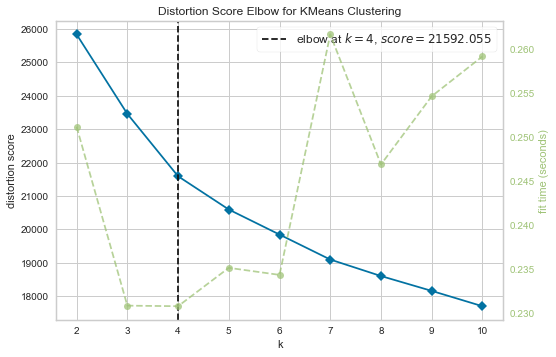

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(Scaled_Data)
Elbow_M.show()

In [42]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(scaled_ds)
#Adding the Clusters feature to the scaled dataframe.
Scaled_Data["Clusters"]= yhat_AC
#Adding the Clusters feature to the orignal dataframe.
new_df["Clusters"]= yhat_AC

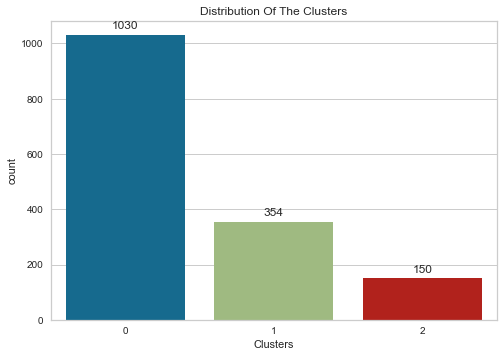

In [43]:
import seaborn as sns
#Plotting countplot of clusters
pl = sns.countplot(x=new_df["Clusters"])
for p in pl.patches:
    pl.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
pl.set_title("Distribution Of The Clusters")
plt.show()

In [44]:
new_df["Age_Group"] = pd.cut(new_df['Age'], bins=[25, 45, 51, 62, 85],labels=['Youth','Adult','Middle_Age','Old_Age'])

new_df['Age_Group']= new_df['Age_Group'].cat.codes

## Insights on sales based on clusters

In [45]:
## define a function for heatmap plot 
def plot_heatmap(cross_table, fmt='g'):
    fig, ax = plt.subplots(figsize=(20,10))
    sns.heatmap(cross_table,
                annot=True,
                fmt=fmt,
                cmap='rocket_r',
                linewidths=.5,
                ax=ax)
    sns.set()
    plt.show();

In [46]:
# Get count and Sum of TotalPurchases with Clusters
table1 = pd.pivot_table(new_df,values='TotalPurchases', 
               index='Clusters', 
               aggfunc={'TotalPurchases':['count','sum']})
table1

,count,sum
Clusters,,
0,1030,15017
1,354,8698
2,150,3669


In [47]:
# Get count and Sum of TotalCmpAccepted with Clusters
table2 =pd.pivot_table(new_df,values='TotalCmpAccept', 
               index='Clusters', 
               aggfunc={'TotalCmpAccept':['sum','count']})
table2

,count,sum
Clusters,,
0,1030,188
1,354,160
2,150,95


In [48]:
# Get count and Sum of TotalProducts with Clusters
table3 = pd.pivot_table(new_df,values='TotalProducts', 
               index=['Clusters'],
               aggfunc={'TotalProducts':['sum','count']})
table3

,count,sum
Clusters,,
0,1030,106276
1,354,225299
2,150,158793


In [49]:
# Get count and Sum of Income with Clusters
table4 = pd.pivot_table(new_df,values='Income', 
               index=['Clusters'],
               aggfunc={'Income':['sum','count']})
table4

,count,sum
Clusters,,
0,1030,36350108.0
1,354,19920979.0
2,150,10562875.5


In [50]:
# Get count and Sum of TotalProducts with Clusters
table5 = pd.pivot_table(new_df,values='Age_Group', 
               index=['Clusters'],
               aggfunc={'Age_Group':['sum','count']})
table5

,count,sum
Clusters,,
0,1030.0,1286.0
1,354.0,686.0
2,150.0,254.0


## Sales on Purchases

### Purchase through Website 

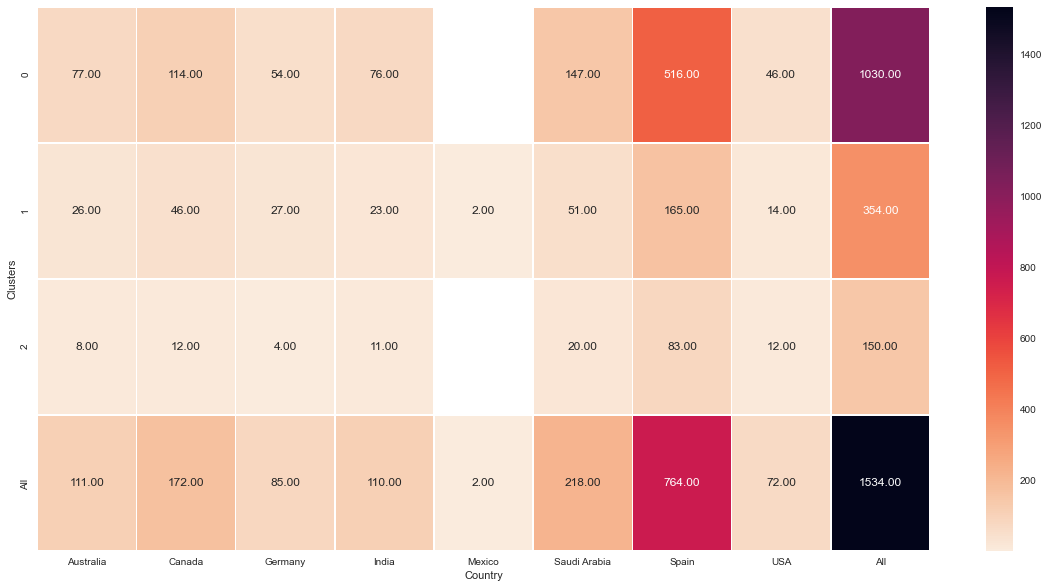

In [51]:
## Insights on Country and WebPrurchase based on cluster segmentation
cross = pd.crosstab(index=new_df['Clusters'],
                    columns=new_df['Country'],
                    values= new_df['NumWebPurchases'],
                    aggfunc='count',
                    margins=True)

plot_heatmap(cross, fmt='.2f')

**`Based on Country,Spain Customer has made 516 times purchases through website in cluster 0 which is highest number of purchases made through website.`**

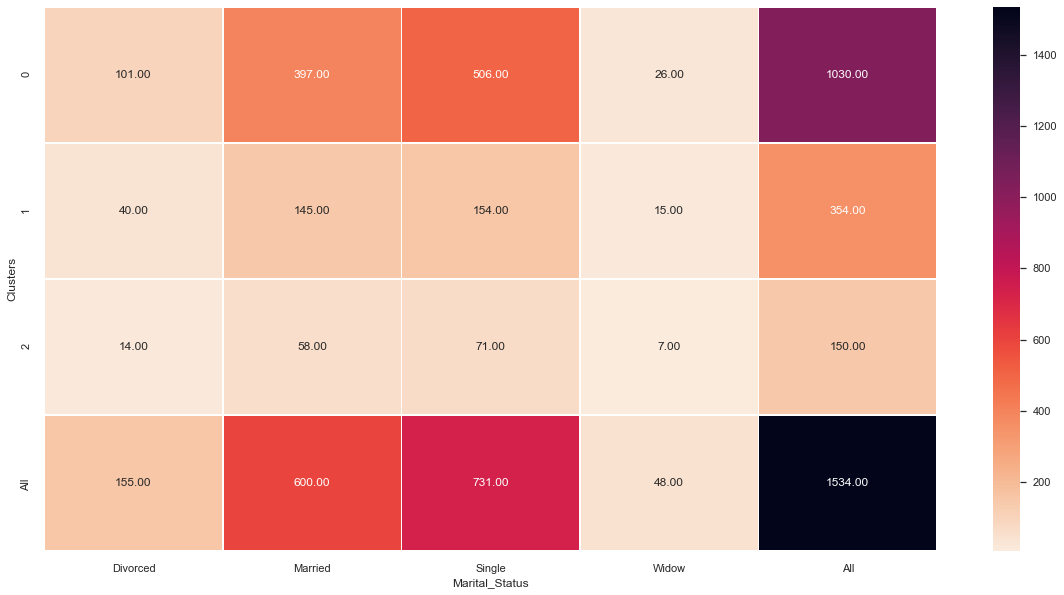

In [52]:
## Insights on Marital_Status and WebPrurchase based on cluster segmentation
cross = pd.crosstab(index=new_df['Clusters'],
                    columns=new_df['Marital_Status'],
                    values= new_df['NumWebPurchases'],
                    aggfunc='count',
                    margins=True)

plot_heatmap(cross, fmt='.2f')

**`Based on MaritalStatus, Single Customer has made 506 times purchases through website in cluster 0 which is highest number of purchases made through website.`**

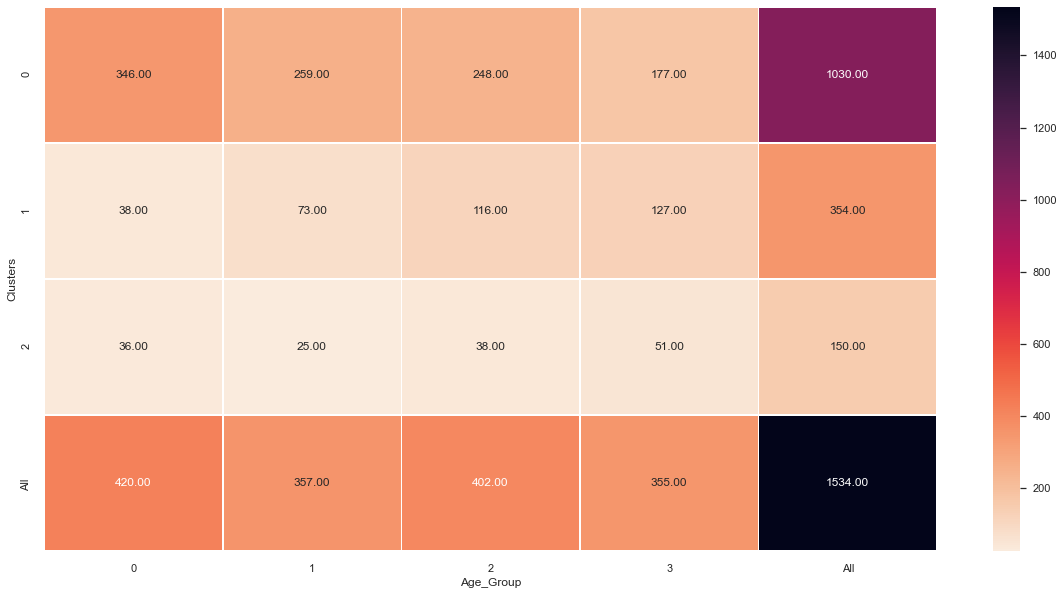

In [53]:
## Insights on Marital_Status and WebPrurchase based on cluster segmentation
cross = pd.crosstab(index=new_df['Clusters'],
                    columns=new_df['Age_Group'],
                    values= new_df['NumWebPurchases'],
                    aggfunc='count',
                    margins=True)

plot_heatmap(cross, fmt='.2f')

**`Based on AgeGroup, Youth(0) Customer has made 346 times purchases through website in cluster 0 which is highest number of purchases made through website.`**

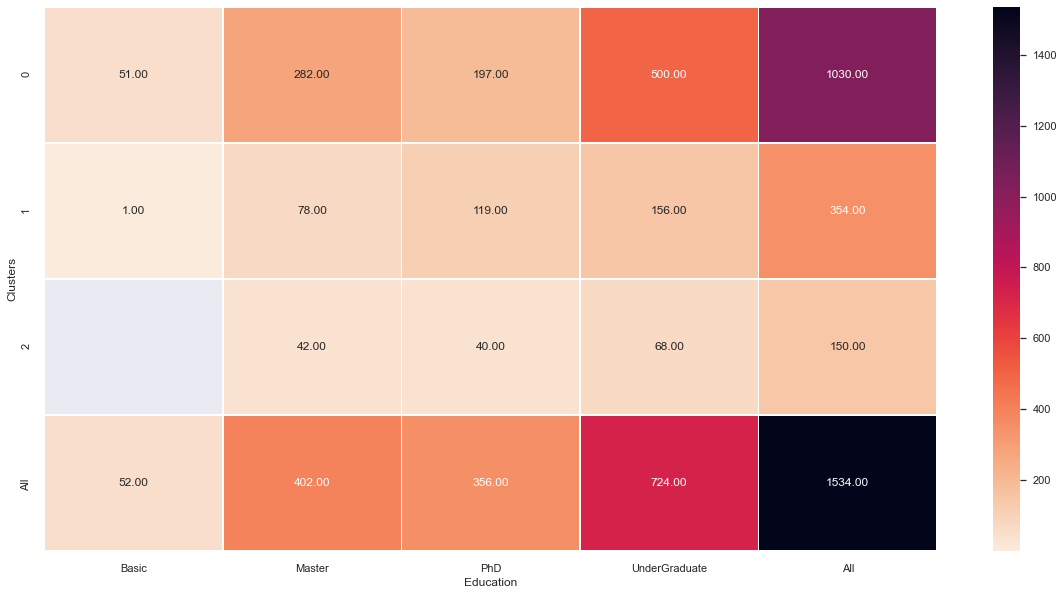

In [54]:
## Insights on Marital_Status and WebPrurchase based on cluster segmentation
cross = pd.crosstab(index=new_df['Clusters'],
                    columns=new_df['Education'],
                    values= new_df['NumWebPurchases'],
                    aggfunc='count',
                    margins=True)

plot_heatmap(cross, fmt='.2f')

**`Based on Education, UnderGraduate Customer has made 500 times purchases through website in cluster 0 which is highest number of purchases made through website.`**

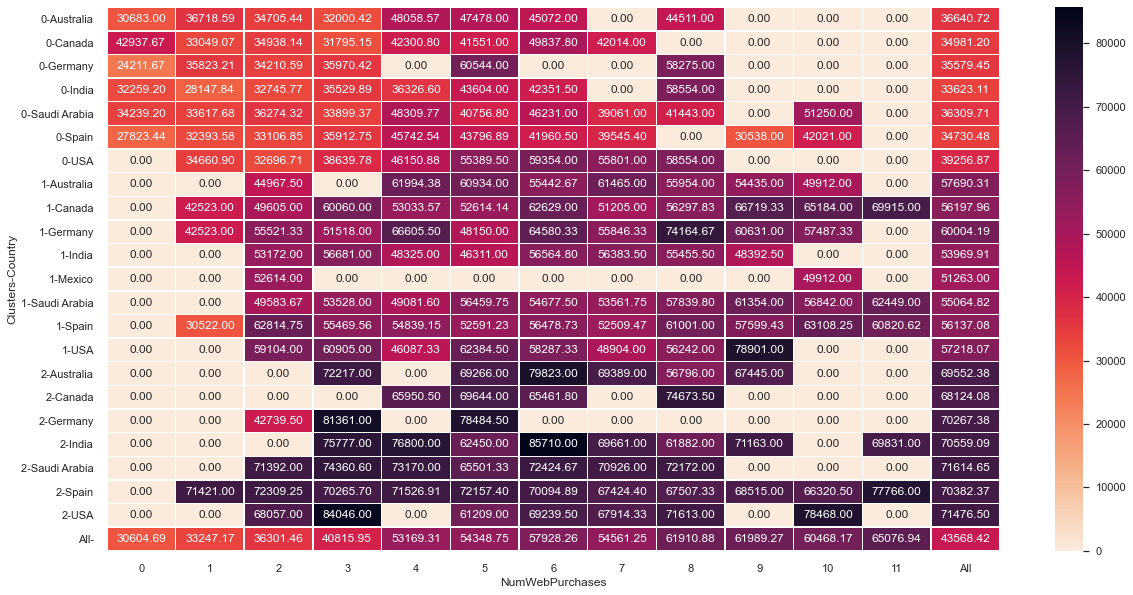

In [55]:
# Average Amount spent on Purchase over country with in clusters
WebPurchase_Country = pd.pivot_table(new_df,values='Income', 
               index=['Clusters','Country'],
               columns=['NumWebPurchases'],
               aggfunc={'Income':np.mean},
               fill_value=0,margins=True)
plot_heatmap(WebPurchase_Country,fmt='.2f')

>- **`India` spent 86k amount on purchase which is highest among all countries in cluster 2.**
>- **`USA` spent 84K amount on purchase which is 2nd highest among all countries in cluster 2.**
>- **`Germany` spent 81K amount on purchase which is 3rd highest among all countries in cluster 2.**

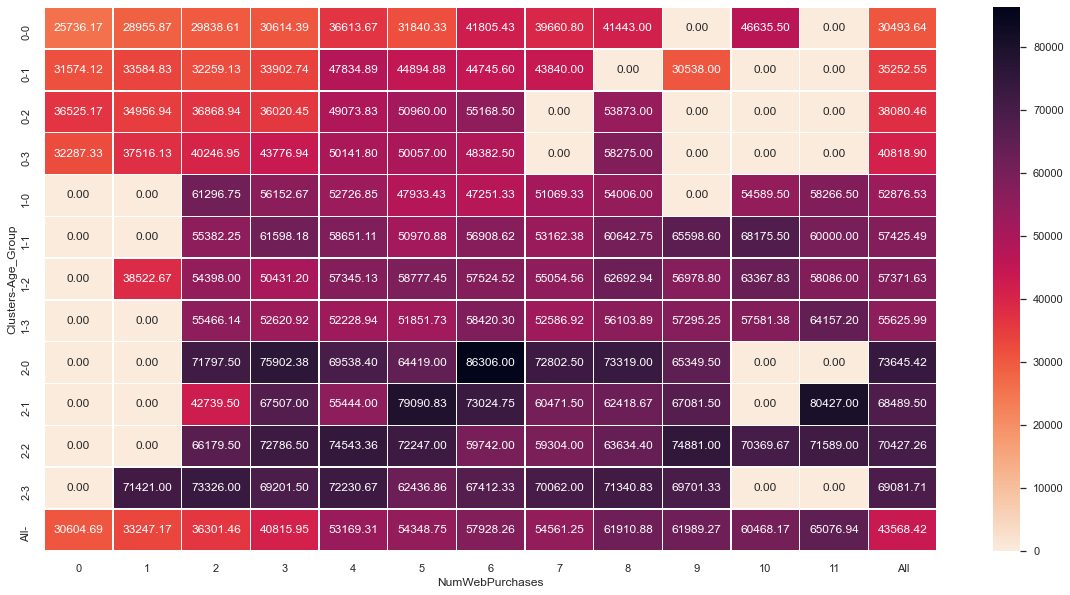

In [56]:
# Average Amount spent on Purchase over AgeGroup with in clusters
WebPurchase_AgeGroup = pd.pivot_table(new_df,values='Income', 
               index=['Clusters','Age_Group'],
               columns=['NumWebPurchases'],
               aggfunc={'Income':np.mean},
               fill_value=0,margins=True)
plot_heatmap(WebPurchase_AgeGroup,fmt='.2f')

>- **`Youth` spent 86k amount on purchase which is highest among all age_group in cluster 2.**
>- **`Adults` spent 80k amount on purchase which is 2nd highest among all age_group in cluster 2.**

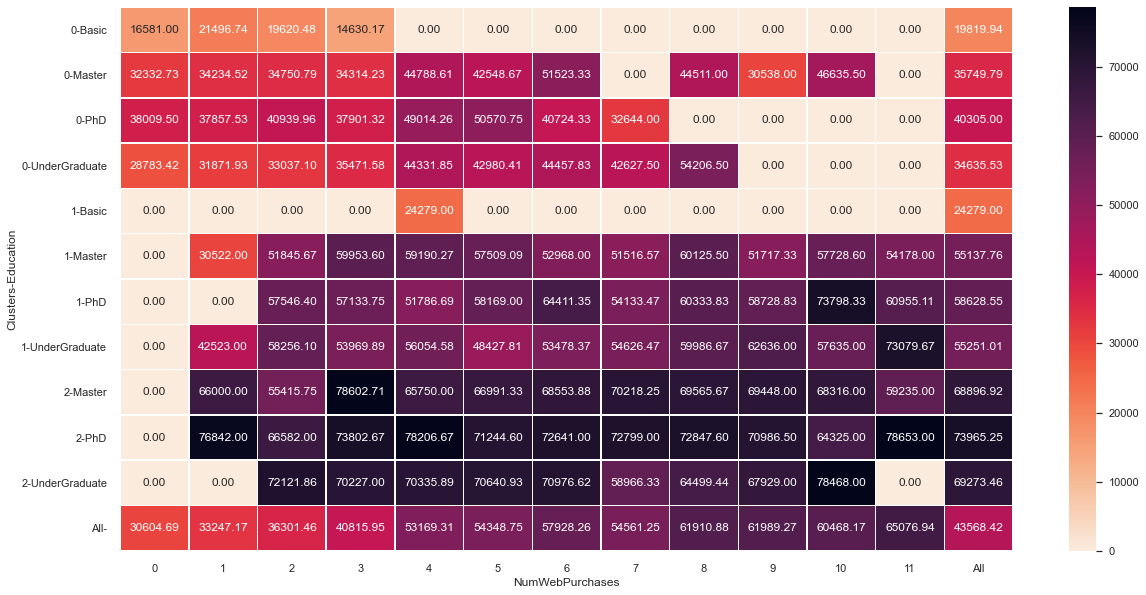

In [57]:
# Average Amount spent on Purchase over Education with in clusters
WebPurchase_Education = pd.pivot_table(new_df,values='Income', 
               index=['Clusters','Education'],
               columns=['NumWebPurchases'],
               aggfunc={'Income':np.mean},
               fill_value=0,margins=True)
plot_heatmap(WebPurchase_Education,fmt='.2f')

>- Average 44K amount spent in all custerthrough Websites.
>- In Cluster 2, Phd Customer had spent amount of 74K for purchasing annually for household through website. Which is 30k extra from average.
>- In cluster 0, Basic had sepnt less amount than average.

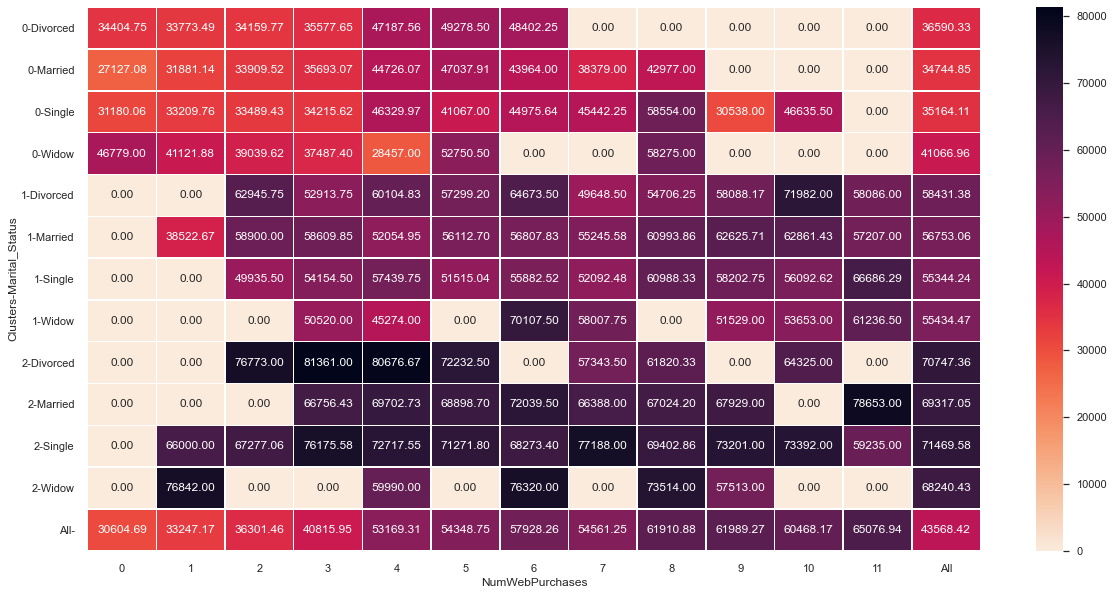

In [58]:
# Average Amount spent on Purchase over MaritalStatus with in clusters
WebPurchase_MS = pd.pivot_table(new_df,values='Income', 
               index=['Clusters','Marital_Status'],
               columns=['NumWebPurchases'],
               aggfunc={'Income':np.mean},
               fill_value=0,margins=True)
plot_heatmap(WebPurchase_MS,fmt='.2f')

>- Average 44K amount spent in all custerthrough Websites.
>- In Cluster 2, Divorced and Single Customer had spent amount of 71K for purchasing annually for household through website. Which is 30k extra from average.
>- In cluster 0, Married had sepnt less amount than average.

### Purchase through Store

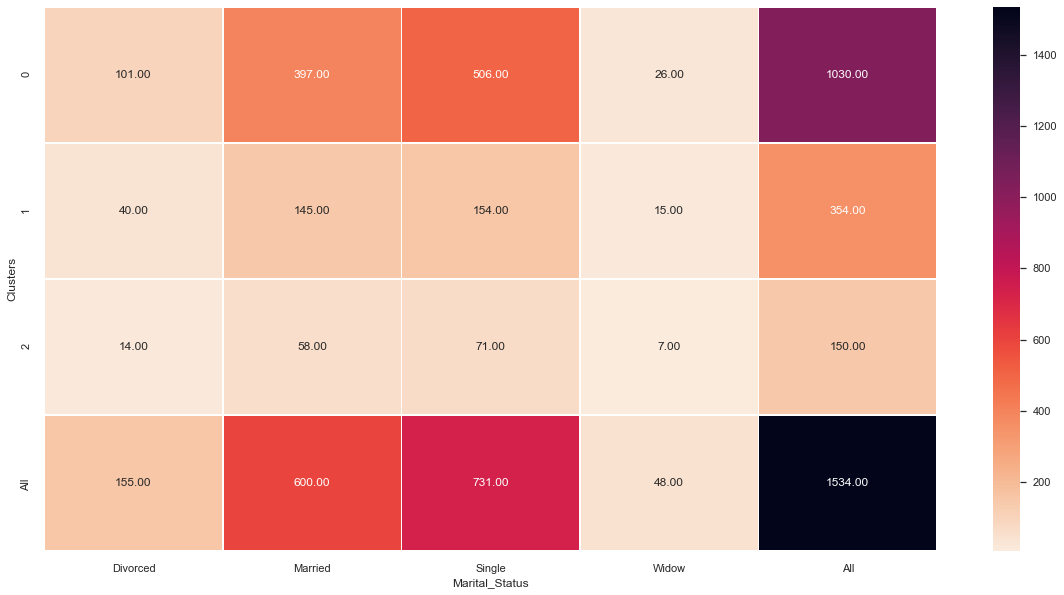

In [67]:
## Insights on Marital_Status and StorePrurchase based on cluster segmentation
cross = pd.crosstab(index=new_df['Clusters'],
                    columns=new_df['Marital_Status'],
                    values= new_df['NumStorePurchases'],
                    aggfunc='count',
                    margins=True)

plot_heatmap(cross, fmt='.2f')

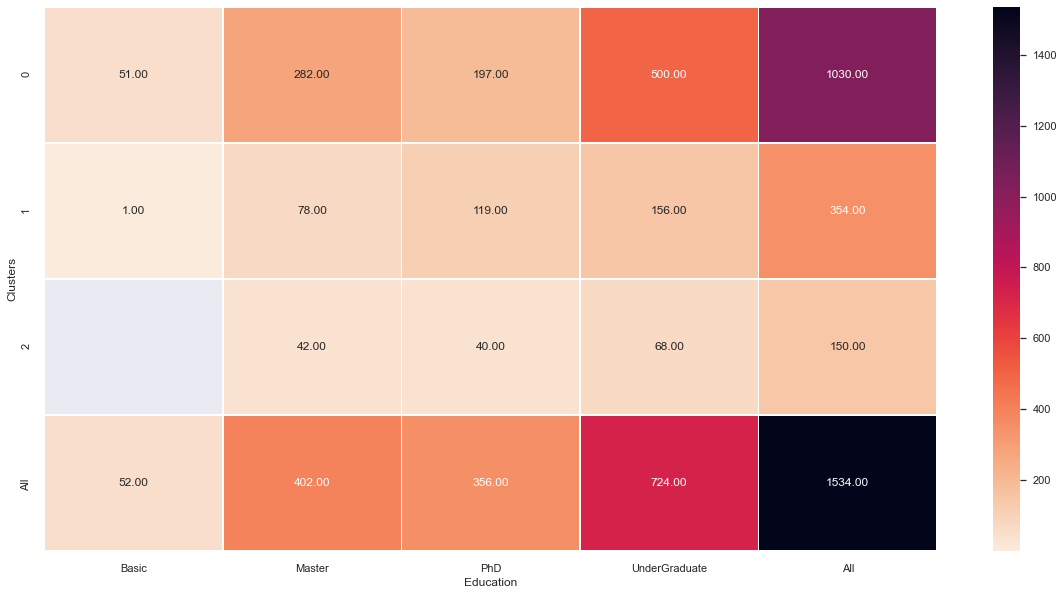

In [69]:
## Insights on Education and StorePrurchase based on cluster segmentation
cross = pd.crosstab(index=new_df['Clusters'],
                    columns=new_df['Education'],
                    values= new_df['NumStorePurchases'],
                    aggfunc='count',
                    margins=True)

plot_heatmap(cross, fmt='.2f')

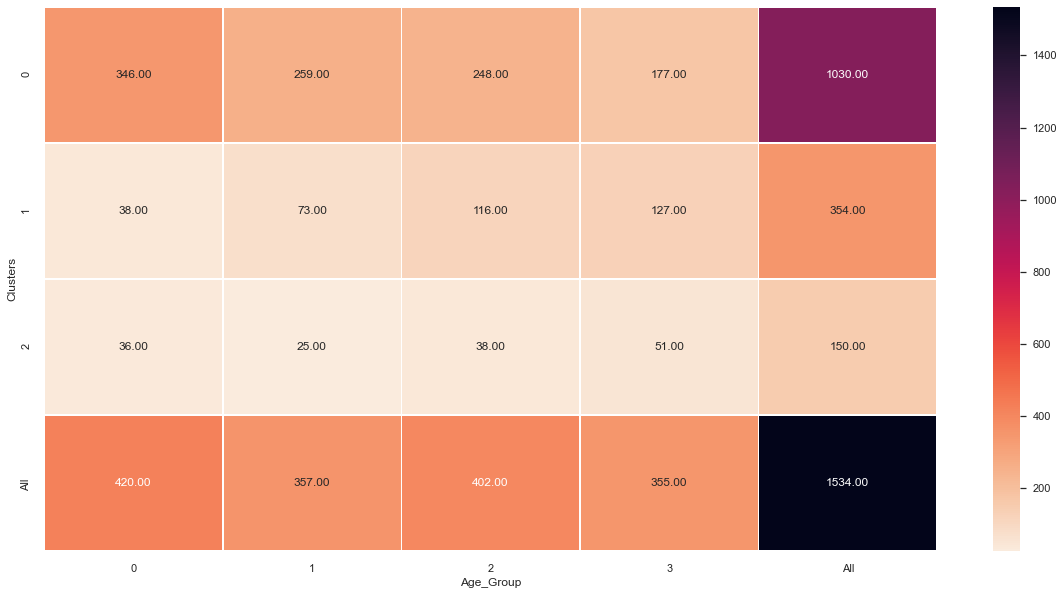

In [70]:
## Insights on AgeGroup and StorePrurchase based on cluster segmentation
cross = pd.crosstab(index=new_df['Clusters'],
                    columns=new_df['Age_Group'],
                    values= new_df['NumStorePurchases'],
                    aggfunc='count',
                    margins=True)

plot_heatmap(cross, fmt='.2f')

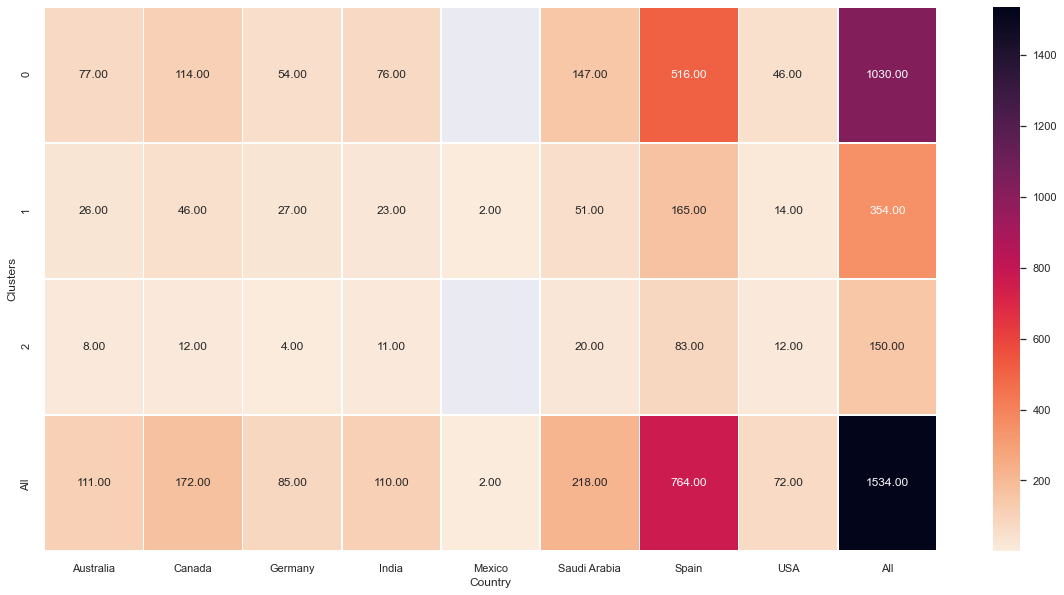

In [71]:
## Insights on Country and StorePrurchase based on cluster segmentation
cross = pd.crosstab(index=new_df['Clusters'],
                    columns=new_df['Country'],
                    values= new_df['NumStorePurchases'],
                    aggfunc='count',
                    margins=True)

plot_heatmap(cross, fmt='.2f')

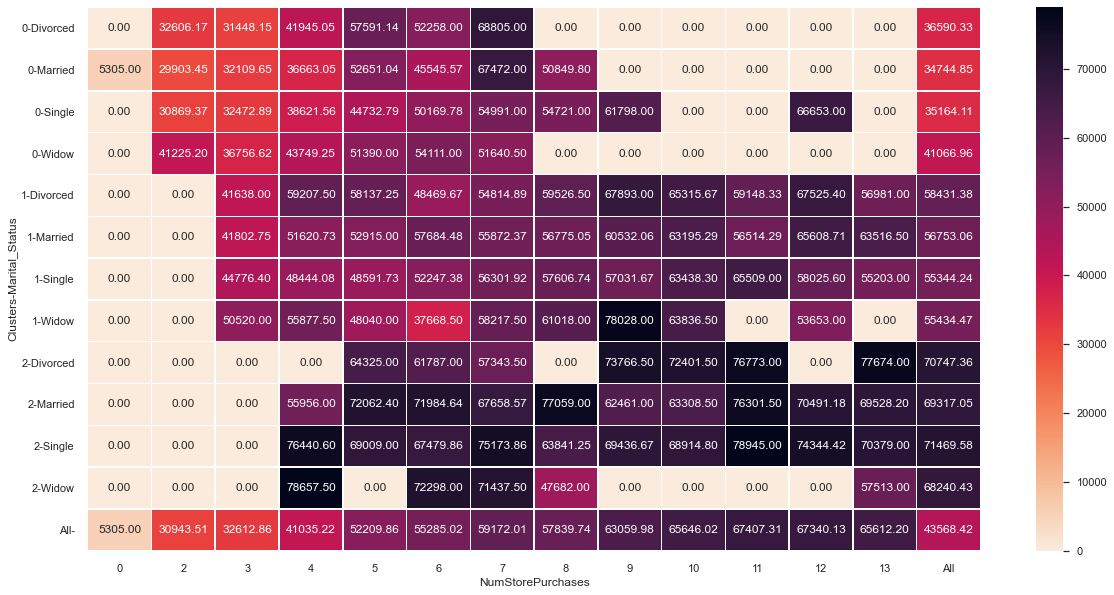

In [73]:
# Average Amount spent on Purchase over MaritalStatus with in clusters
StorePurchase_MS = pd.pivot_table(new_df,values='Income', 
               index=['Clusters','Marital_Status'],
               columns=['NumStorePurchases'],
               aggfunc={'Income':np.mean},
               fill_value=0,margins=True)
plot_heatmap(StorePurchase_MS,fmt='.2f')

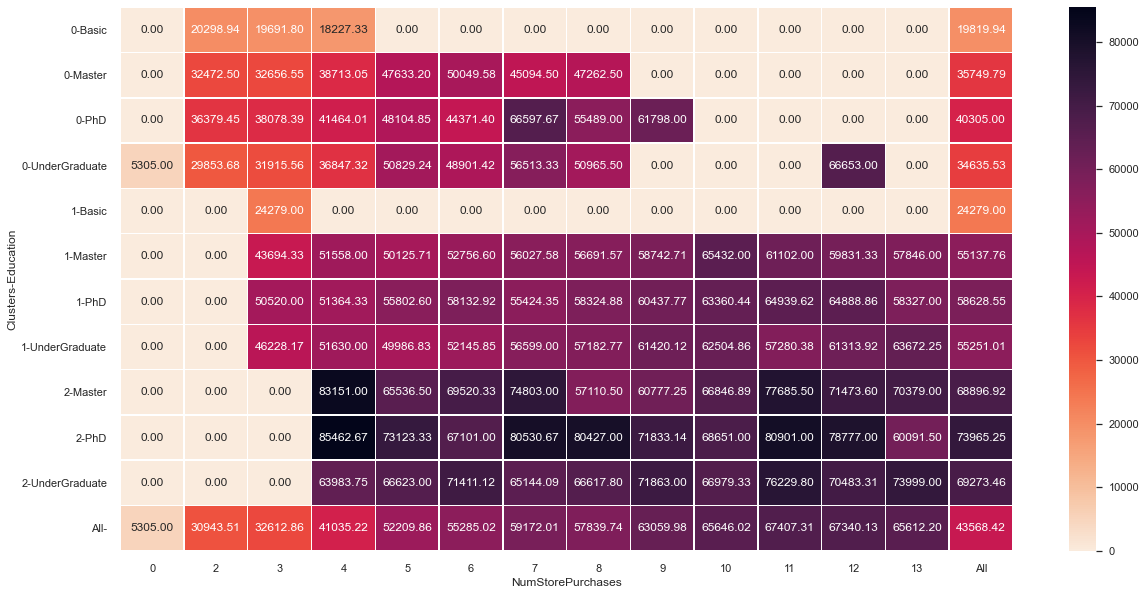

In [74]:
# Average Amount spent on Purchase over MaritalStatus with in clusters
StorePurchase_Education = pd.pivot_table(new_df,values='Income', 
               index=['Clusters','Education'],
               columns=['NumStorePurchases'],
               aggfunc={'Income':np.mean},
               fill_value=0,margins=True)
plot_heatmap(StorePurchase_Education,fmt='.2f')

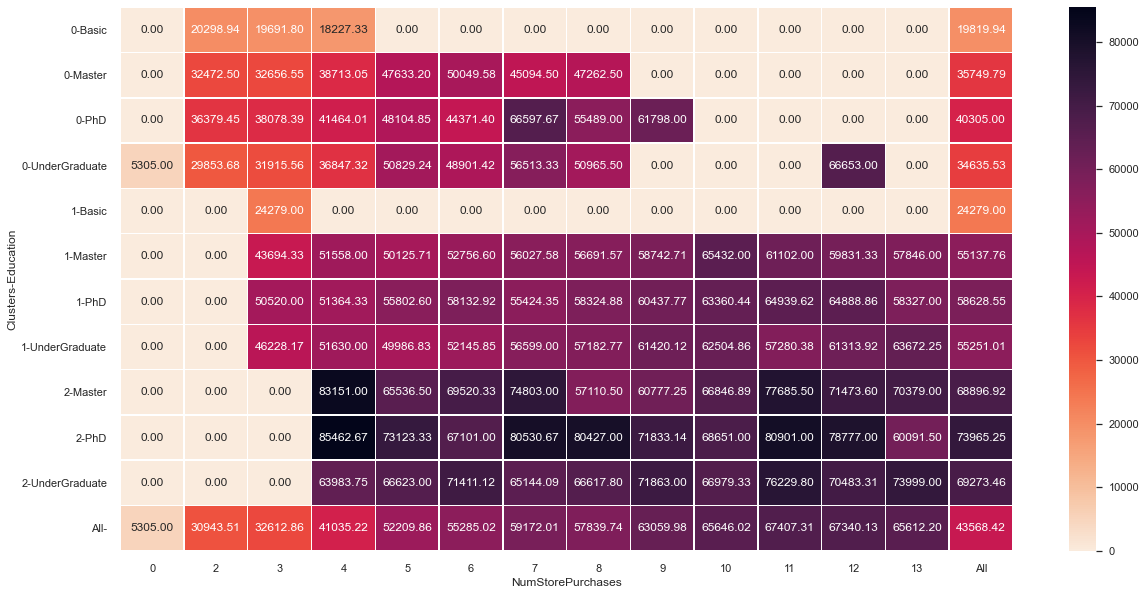

In [75]:
# Average Amount spent on Purchase over AgeGroup with in clusters
StorePurchase_Age = pd.pivot_table(new_df,values='Income', 
               index=['Clusters','Age_Group'],
               columns=['NumStorePurchases'],
               aggfunc={'Income':np.mean},
               fill_value=0,margins=True)
plot_heatmap(StorePurchase_Education,fmt='.2f')

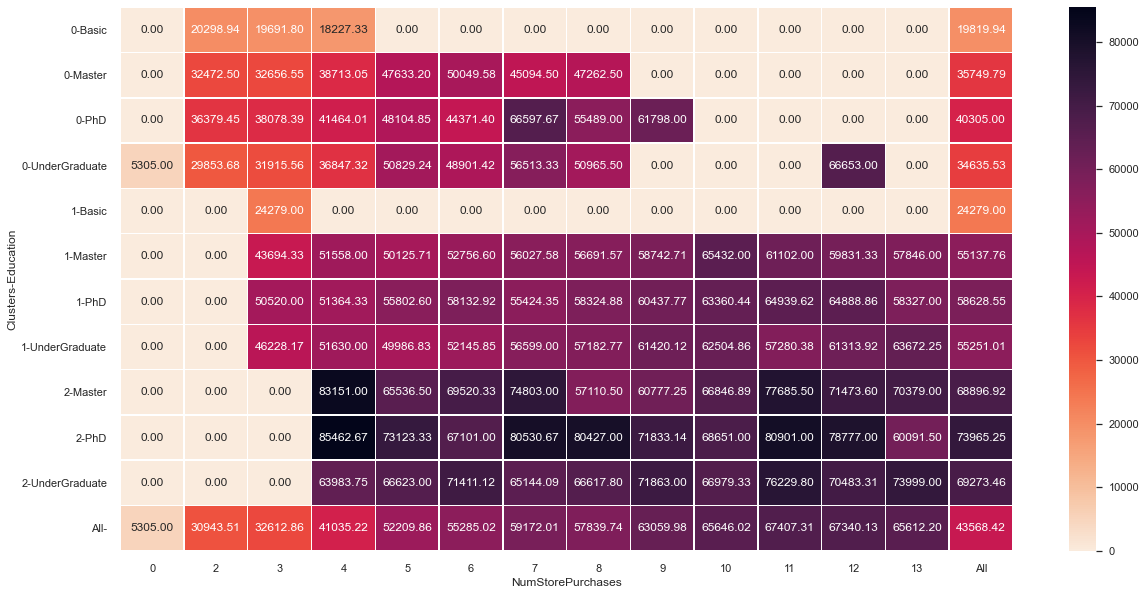

In [76]:
# Average Amount spent on Purchase over Country with in clusters
StorePurchase_Country = pd.pivot_table(new_df,values='Income', 
               index=['Clusters','Country'],
               columns=['NumStorePurchases'],
               aggfunc={'Income':np.mean},
               fill_value=0,margins=True)
plot_heatmap(StorePurchase_Education,fmt='.2f')

### Insights on Total Purchases with in clusters 

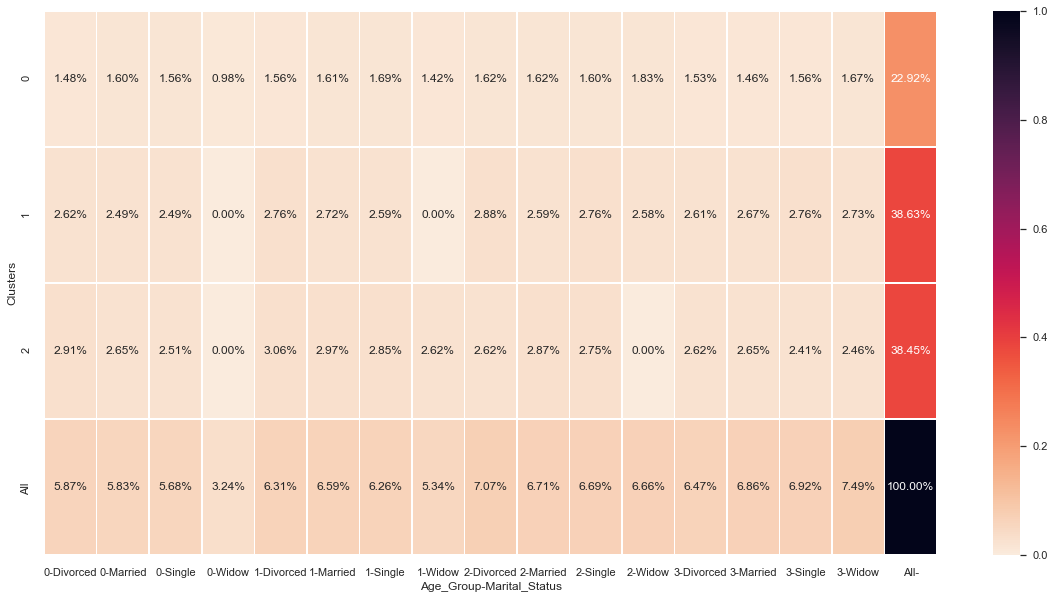

In [59]:
#Average % of total purchases for all channel for Each age group with havig maritaLstatus based on clusters. 
cross = pd.crosstab(index=new_df['Clusters'],
                    columns=[new_df['Age_Group'],new_df['Marital_Status']],
                    values=new_df['TotalPurchases'],
                    aggfunc=np.mean,normalize='all',margins=True)

plot_heatmap(cross, fmt='.2%')

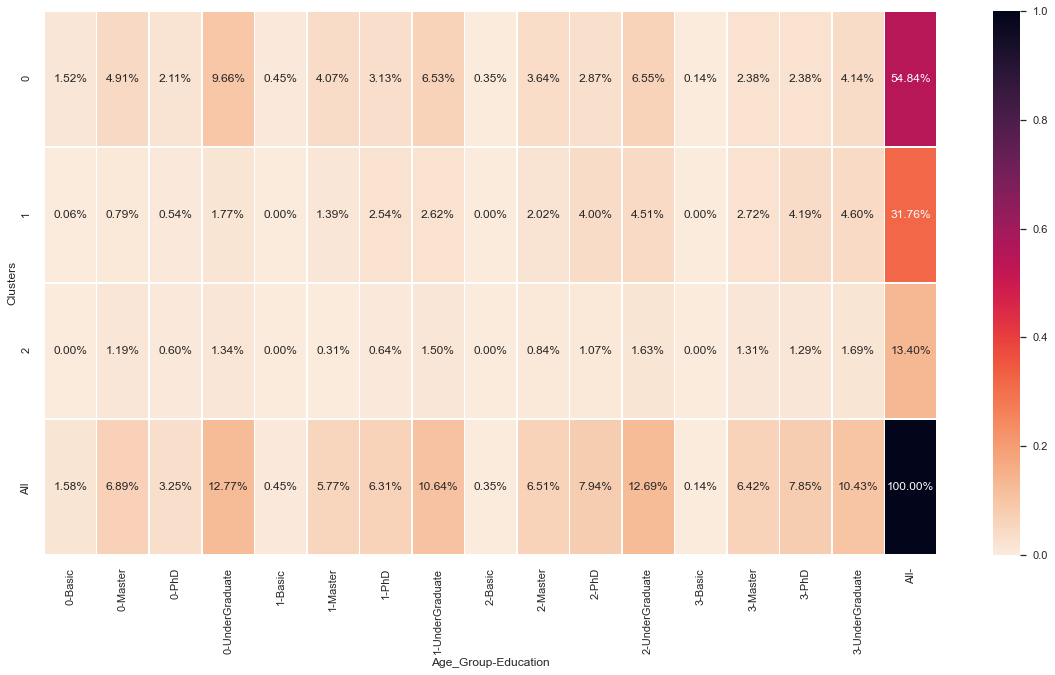

In [65]:
#Average % of total purchases for all channel for Each age group with havig Education based on clusters.
cross = pd.crosstab(index=new_df['Clusters'],
                    columns=[new_df['Age_Group'],new_df['Education']],
                    values=new_df['TotalPurchases'],
                    aggfunc=np.sum,normalize='all',margins=True)

plot_heatmap(cross, fmt='.2%')

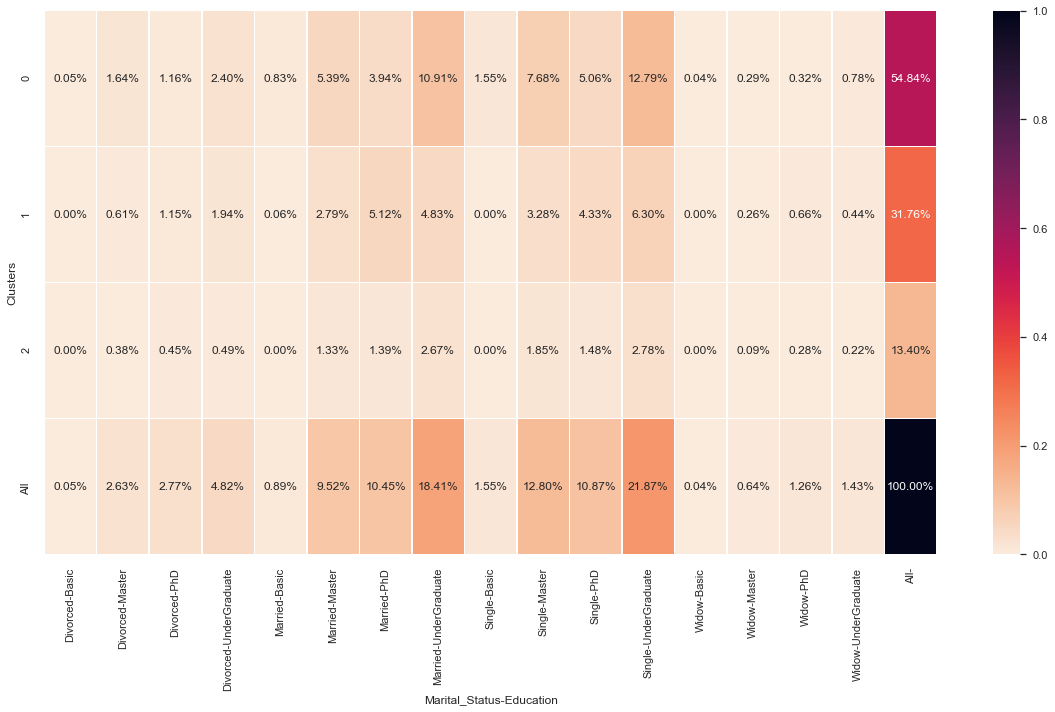

In [77]:
#Average % of total purchases for all channel for Each age group with havig Education based on clusters.
cross = pd.crosstab(index=new_df['Clusters'],
                    columns=[new_df['Marital_Status'],new_df['Education']],
                    values=new_df['TotalPurchases'],
                    aggfunc=np.sum,normalize='all',margins=True)

plot_heatmap(cross, fmt='.2%')

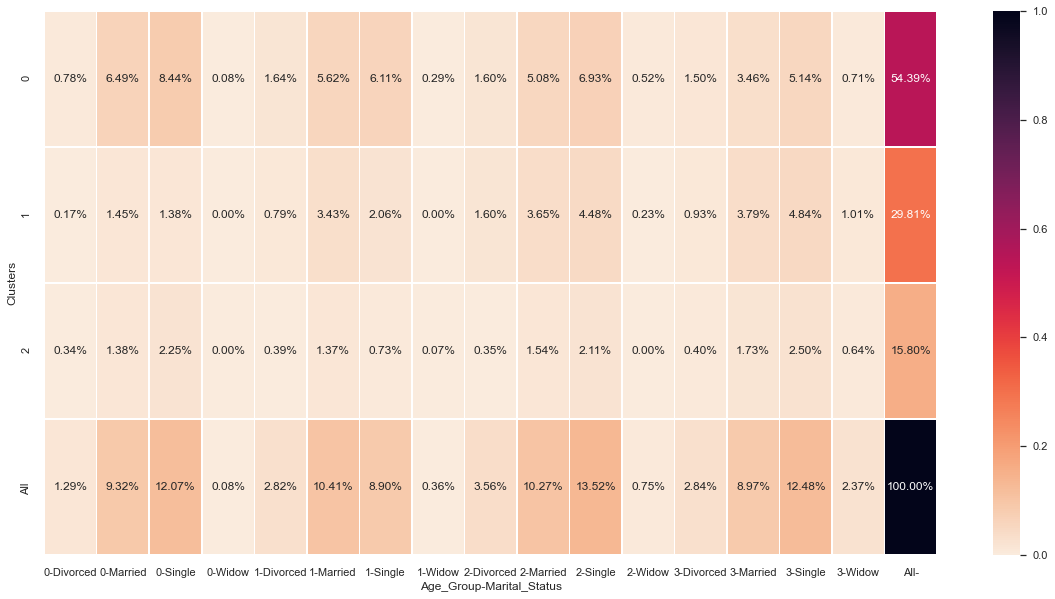

In [60]:
#Average % of Income for all channel for Each age group with havig maritaLstatus based on clusters.
cross = pd.crosstab(index=new_df['Clusters'],
                    columns=[new_df['Age_Group'],new_df['Marital_Status']],
                    values=new_df['Income'],
                    aggfunc=np.sum,normalize='all',margins=True)

plot_heatmap(cross, fmt='.2%')

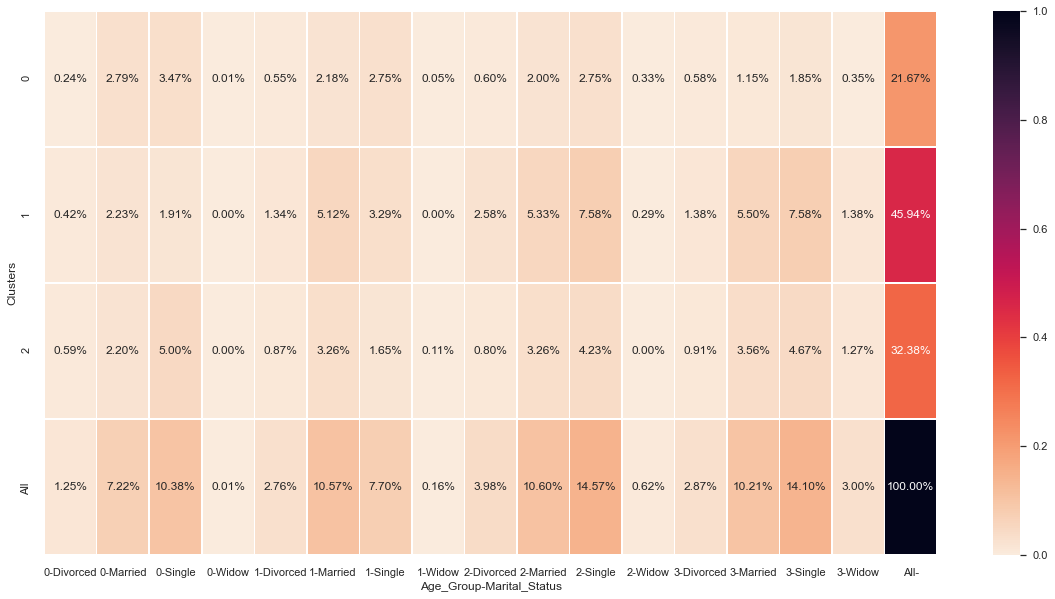

In [61]:
cross = pd.crosstab(index=new_df['Clusters'],
                    columns=[new_df['Age_Group'],new_df['Marital_Status']],
                    values=new_df['TotalProducts'],
                    aggfunc=np.sum,normalize='all',margins=True)

plot_heatmap(cross, fmt='.2%')